# Web Scraping

## Lesson 38: the webbrowser module

In [1]:
import webbrowser

In [2]:
webbrowser.open("https://automatetheboringstuff.com/")

True

In [3]:
import webbrowser, sys, pyperclip

def google_maps(address=None):
    print(address)

    if address==None:
        address = pyperclip.paste()

    google_maps_address = "https://www.google.com/maps/search/?api=1&query="
    # to_search = google_maps_address + "+".join(address.split())
    to_search = google_maps_address + "+".join(address.split())
    webbrowser.open(to_search)

In [4]:
google_maps("tour eiffel")

tour eiffel


We will create a Batch file, which will make it easier to call our python .py file without having to write:

[python path] [pythons .py script path] [args]

We just want to write:

mapit [address]

---

## Lesson 38: Downloading from Web with Requests

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Thomas\\ML\\automate-the-boring-stuff-python'

In [5]:
import requests

In [9]:
res = requests.get("https://automatetheboringstuff.com/files/rj.txt")

In [10]:
res.status_code

200

In [11]:
len(res.text)

178978

In [12]:
print(res.text[:500])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Romeo and Juliet

Author: William Shakespeare

Posting Date: May 25, 2012 [EBook #1112]
Release Date: November, 1997  [Etext #1112]

Language: Eng


In [13]:
res.raise_for_status()

In [14]:
badRes = requests.get("https://automatetheboringstuff.com/files/rjsdfsdffsdsfs.txt")

In [16]:
badRes.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: https://automatetheboringstuff.com/files/rjsdfsdffsdsfs.txt

Need to write it as a binary file (hence the 'wb'), to maintain the unicode encoding of the text

In [17]:
playFile = open("RomeoAndJuliet.txt", "wb")

In [18]:
for chunk in res.iter_content(100000):
    playFile.write(chunk)

In [19]:
playFile.close()

In [21]:
os.path.abspath("RomeoAndJuliet.txt")

'C:\\Thomas\\ML\\automate-the-boring-stuff-python\\RomeoAndJuliet.txt'

---

## Lesson 40: Parsing HTML with BeautifulSoup

In [22]:
import bs4

In [23]:
import requests

In [33]:
link = "https://www.amazon.com/Automate-Boring-Stuff-Python-Programming-ebook/dp/B00WJ049VU"

In [34]:
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
    }
res = requests.get(link, headers=headers) 

In [35]:
res.raise_for_status()

In [36]:
res.text[:20]

'<!DOCTYPE html>\n<!--'

In [39]:
soup = bs4.BeautifulSoup(res.text, "html.parser")

In [41]:
type(soup)

bs4.BeautifulSoup

In [45]:
soup.select("#buyNewSection > h5 > div > div.a-column.a-span8.a-text-right.a-span-last > div > span.a-size-medium.a-color-price.offer-price.a-text-normal")

[]

In [46]:
res2 = requests.get("https://www.lemonde.fr/planete/article/2020/02/09/avec-811-morts-en-chine-le-nouveau-coronavirus-devient-plus-meurtrier-que-le-sras_6028944_3244.html")

In [47]:
res2.raise_for_status()

In [48]:
soup2 = bs4.BeautifulSoup(res2.text, "html.parser")

In [50]:
elems = soup2.select("#habillagepub > section > header > div > h1")

In [52]:
elems[0].text.strip()

'Avec 811\xa0morts en Chine, le nouveau coronavirus devient plus meurtrier que le SRAS'

### Let's functionalize this

In [64]:
import bs4, requests

def get_title_lemonde(articleUrl):
    res = requests.get(articleUrl)
    res.raise_for_status()
    
    soup = bs4.BeautifulSoup(res.text)
    elems = soup.select("#habillagepub > section > header > div > h1")
    
    return elems[0].text.strip()

In [65]:
get_title_lemonde("https://www.lemonde.fr/sport/article/2020/02/09/judo-teddy-riner-battu-pour-la-premiere-fois-depuis-plus-de-neuf-ans_6028969_3242.html")

'Judo\xa0: Teddy Riner battu pour la première fois depuis plus de neuf ans'

In [66]:
def get_subtitle_lemonde(articleUrl):
    res = requests.get(articleUrl)
    res.raise_for_status()
    
    soup = bs4.BeautifulSoup(res.text)
    elems = soup.select("#habillagepub > section > header > div > p")
    
    return elems[0].text.strip()

In [67]:
get_subtitle_lemonde("https://www.lemonde.fr/sport/article/2020/02/09/judo-teddy-riner-battu-pour-la-premiere-fois-depuis-plus-de-neuf-ans_6028969_3242.html")

'A moins de six mois des JO 2020, le double champion olympique a été battu par le Japonais Kokoro Kageura, qui a mis un terme à sa vertigineuse série de 154 victoires consécutives.'

In [68]:
get_subtitle_lemonde("https://www.lemonde.fr/cinema/article/2020/02/07/oscars-2020-le-vieil-hollywood-fera-t-il-un-triomphe-a-1917_6028837_3476.html")

'Le film du Britannique Sam Mendes part favori, devant les productions signées Netflix, pour la cérémonie prévue dimanche 9\xa0février à Los Angeles.'

In [70]:
get_subtitle_lemonde("https://www.lemonde.fr/societe/article/2020/02/09/incendie-mortel-a-lyon-le-principal-suspect-interpelle-et-incarcere-en-tunisie_6028966_3224.html")

'Suspecté d’être à l’origine de l’incendie, en février\xa02019, ayant tué une femme enceinte et sa fille, l’homme faisait l’objet d’un mandat de recherche international.'

In [78]:
def get_price_thomann(articleUrl):
    res = requests.get(articleUrl)
    res.raise_for_status()
    
    
    
    soup = bs4.BeautifulSoup(res.text)
    elems = soup.select("body > div.thomann-page.thomann-page-fr > div > div.thomann-content.thomann-content-module-prod.thomann-content-route-main > div.grid-container > div.thin.grid-section.is-productpage > div.rs-sidebar-box.rs-sidebar-pricebox > div.price-and-availability > div.prod-pricebox-price > div.prod-pricebox-price-primary > div > span")
    
    return elems[0].text.strip()

In [79]:
print(get_price_thomann("https://www.thomann.de/fr/fender_am_perf_strat_mn_satin_lbp.htm"))

1.022 â¬


### RECAP

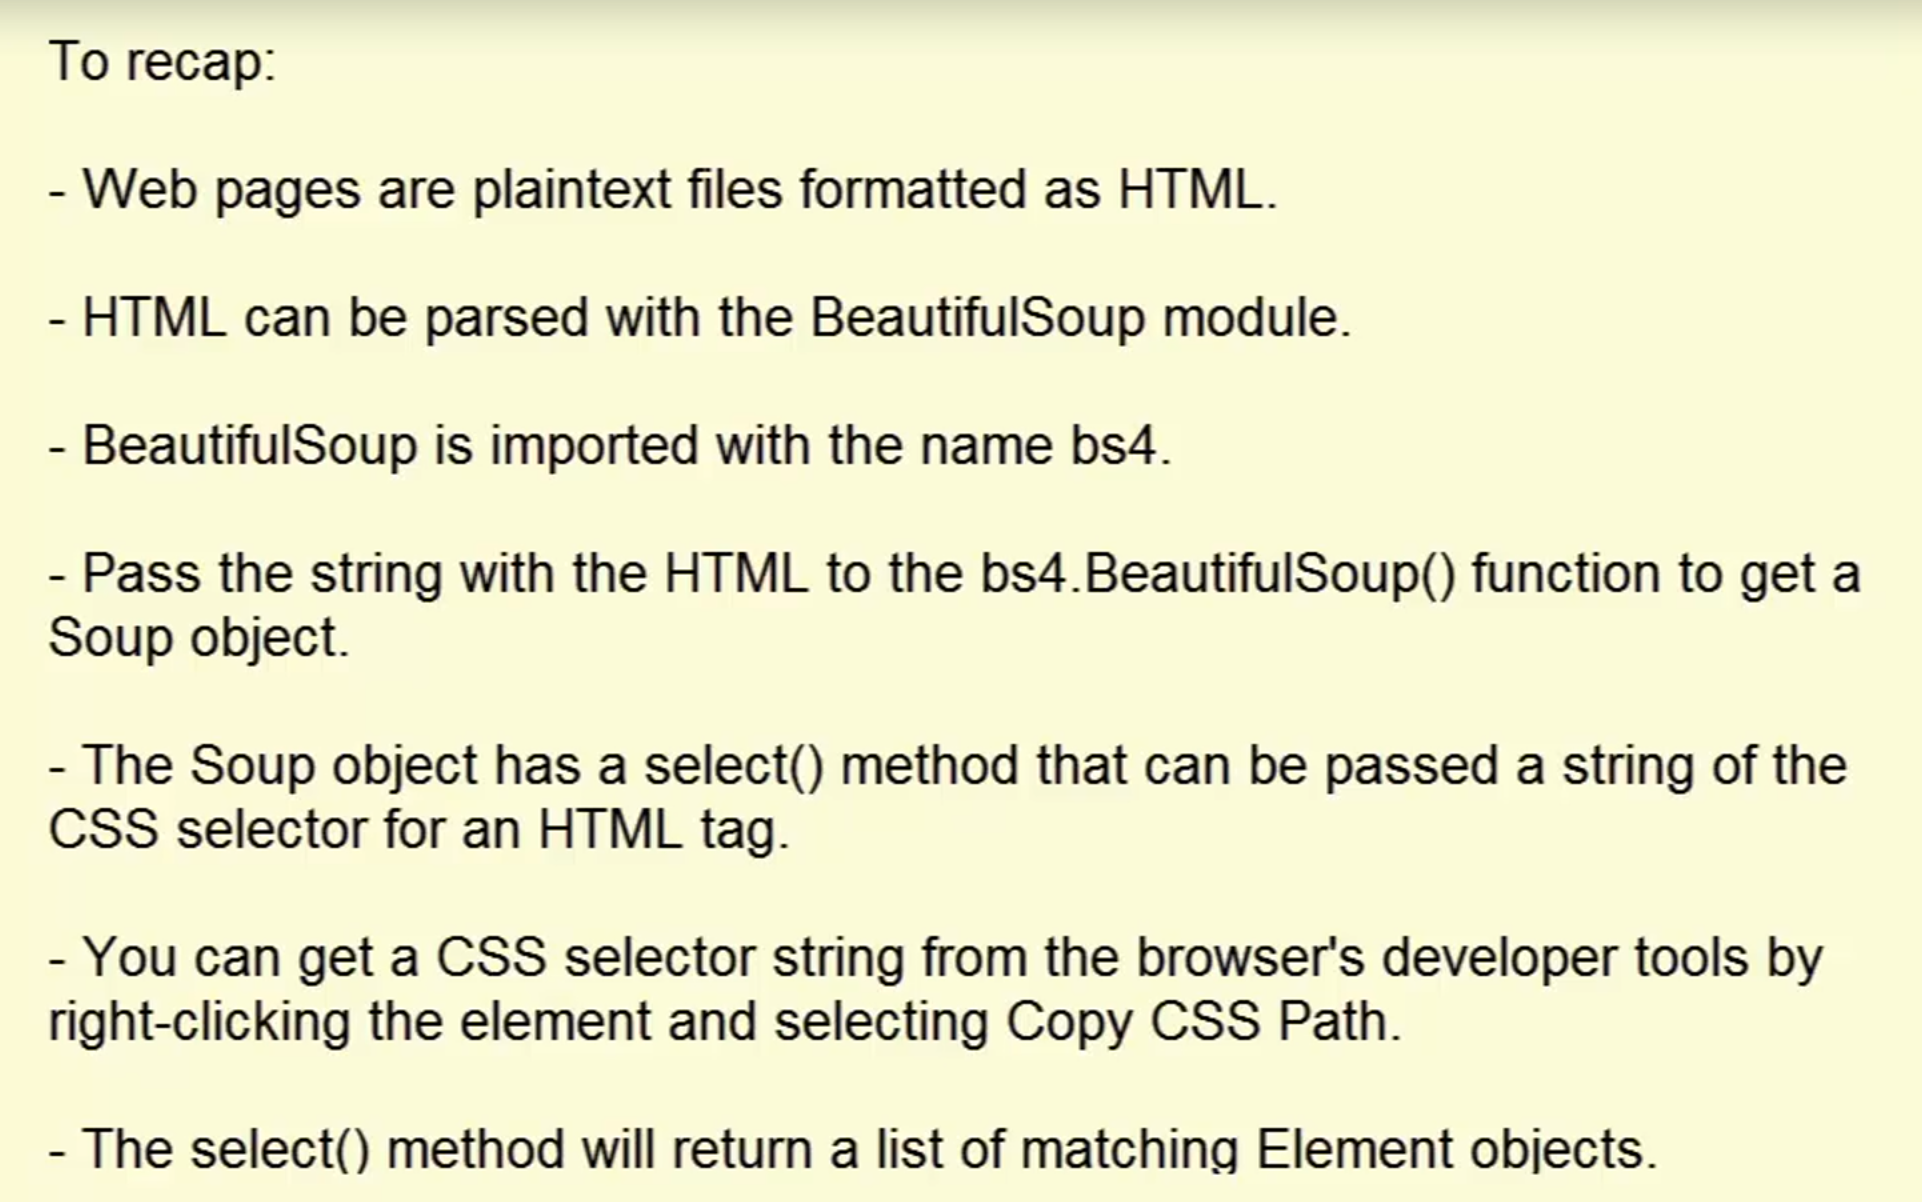

---

## Lesson 41: Controlling browser with Selenium